# Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target='Survived'

In [ ]:
data['Sex']=data['Sex'].map({'female':0,'male':1})
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2})

In [ ]:
data.dropna(inplace=True)

In [ ]:
X=data[features]
y=data[target]

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
model=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.7804878048780488


In [ ]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[ 5  3]
 [ 6 27]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


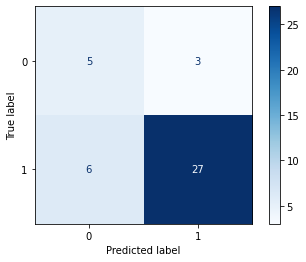

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

# Support Vector Machines

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
data=pd.read_csv("titanic.csv")
data.head()

features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target='Survived'

data['Sex']=data['Sex'].map({'female':0,'male':1})
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2})

data.dropna(inplace=True)

X=data[features]
y=data[target]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)



In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7804878048780488


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 8  0]
 [ 9 24]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


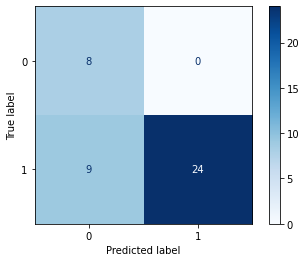

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

# K-Means Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
data = load_iris()
X = data.data


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


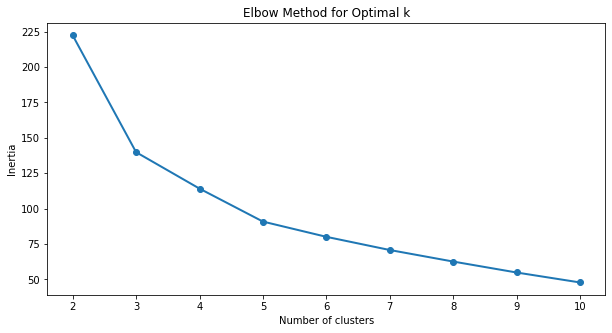

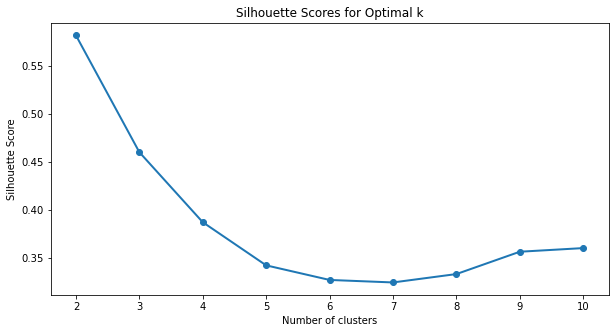

In [ ]:
inertias = []
silhouette_scores = []

# Try different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # Calculate inertia and silhouette score
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertias, marker='o', lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot the silhouette scores graph
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.show()

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


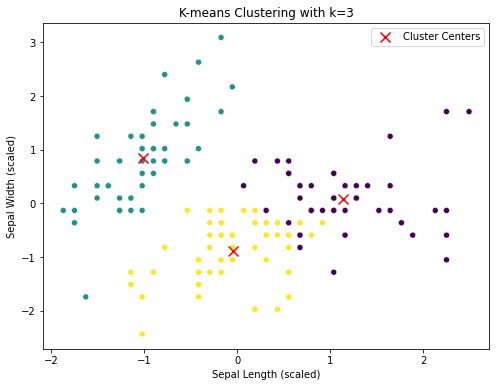

In [ ]:
# Create a scatter plot of the first two features with cluster centers
plt.figure(figsize=(8, 6))
sns.scatterplot(X_scaled[:, 0], X_scaled[:, 1], hue=kmeans.labels_, palette='viridis', legend=None)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='x', label='Cluster Centers')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering with k=3')
plt.legend()
plt.show()


# Principal Component Analysis

PCA is a method used in Machine Learning to reduce the dimensionality in a dataset while keeping
as much information as possible.

This is done by transforming the original features. These new features are called as principal components

In [ ]:
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
iris= datasets.load_iris()

In [ ]:
X=iris.data
y=iris.target

In [ ]:
pca=PCA(n_components=2)

reduced_X=pca.fit_transform(X)

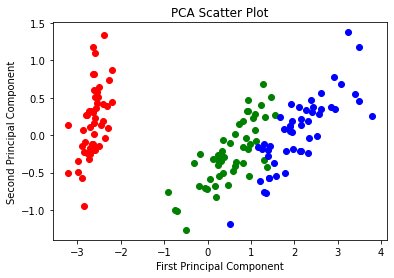

In [ ]:
colors=['red','green','blue']

for i in range(len(colors)):
    plt.scatter(reduced_X[y==i,0], reduced_X[y==i,1],c=colors[i])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.show()

# Pre and Post Model Building using PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Model accuracy without PCA: ", accuracy_score(y_test, y_pred))

Model accuracy without PCA:  1.0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X_reduced = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Model accuracy with PCA: ", accuracy_score(y_test, y_pred))

Model accuracy with PCA:  1.0


# Deep Learning

Deep Learning is a sub-field of Machine Learning that focuses on algorithms inspired by the structure and functions of
the human brain calles as Artificial Neural Networks.

Artificial Neural Networks(ANN)- An ANN is a computational model that is inspired by the way biological neural networks in the human brain process information. It consists of interconnected artificial neurons, or nodes.

Neuron: The basic unit of computation in a neural network - it takes inputs, performs a computation on these inputs, and returns an output.

Weights and Biases: These are the learnable parameters of a neural network. They are updated during the learning process.

Activation Function: The activation function decides whether a neuron should be activated or not. It transforms the inputs of the neuron into its outputs. Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh.